In [2]:
import pandas as pd

df = pd.read_csv('~/PycharmProjects/FinancialProgramClass/Homework/HW2/TAQ_JNJ_1004_1015_2010_trading_.csv', delim_whitespace=True)

df.dtypes

date        int64
hour        int64
minute      int64
second      int64
price     float64
volume      int64
dtype: object

In [3]:
df1 = df.loc[(df.hour >= 10) & (df.hour < 16)]
df2 = df.loc[(df.hour == 9) & (df.minute >= 30)]

data = pd.concat([df1, df2], axis=0)

data.reset_index(drop=True, inplace=True)

data.to_csv('TAQ_JNJ_1004_1015_2010_trading_normal_hours.csv')

In [13]:
from matplotlib import pyplot as py
%matplotlib inline

data.loc[:,'date'] = pd.to_datetime(data.date)

data.dtypes

date      datetime64[ns]
hour               int64
minute             int64
second             int64
price            float64
volume             int64
dtype: object

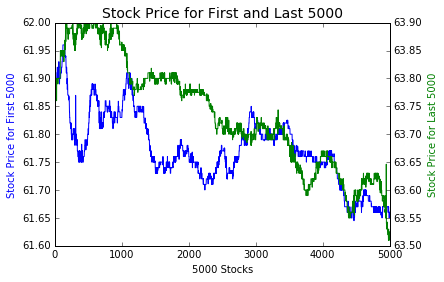

In [29]:
fig, ax1 = py.subplots()

ax2 = ax1.twinx()

ax1.plot(range(5000), data.iloc[:5000, 4], 'b-')
ax2.plot(range(5000), data.iloc[-5000:, 4], 'g-')

py.title('Stock Price for First and Last 5000', fontsize=14)

ax1.set_xlabel('5000 Stocks')
ax1.set_ylabel('Stock Price for First 5000', color='b')
ax2.set_ylabel('Stock Price for Last 5000', color='g')